  # <font color = Blue size =10> Spark Internship  Task 6

  ## <font color = Radium size =6> Nudurumati V H S S Srinivas

<font color = Brown size = 5>  __Problem Statement :__
    - Classify the three types of flowers based on their petal and sepals width and     height using Decision tree and visualize the tree graphically

### importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df = pd.read_csv(r'C:\Users\Sai Srinivas\Downloads\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### we can drop the ID column as its not giving any information

In [4]:
#dropping the ID column
df.drop(['Id'],axis = 1, inplace = True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#dimensions of the data set
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### univariate analysis

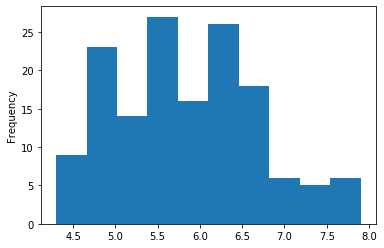

In [9]:
df['SepalLengthCm'].plot.hist()

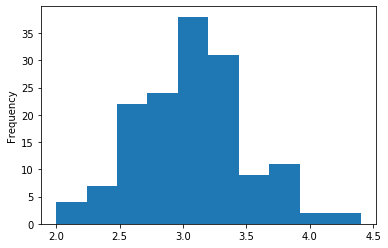

In [10]:
df['SepalWidthCm'].plot.hist()

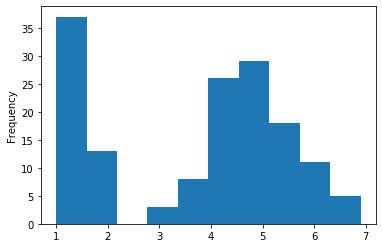

In [11]:
df['PetalLengthCm'].plot.hist()

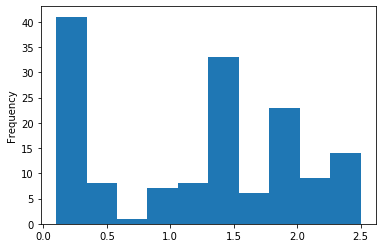

In [12]:
df['PetalWidthCm'].plot.hist()

### BI-Variate analysis

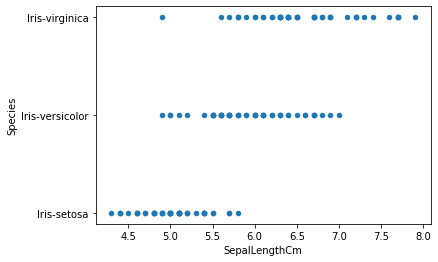

In [13]:
df.plot.scatter(x='SepalLengthCm', y='Species')

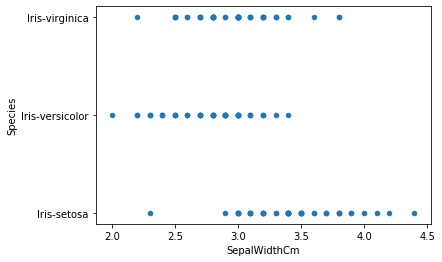

In [14]:
df.plot.scatter(x='SepalWidthCm', y='Species')

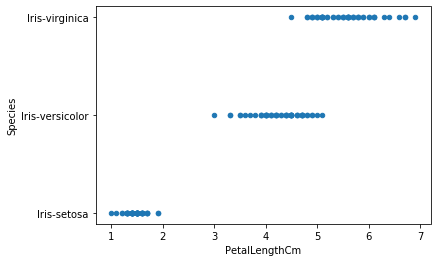

In [15]:
df.plot.scatter(x='PetalLengthCm', y='Species')

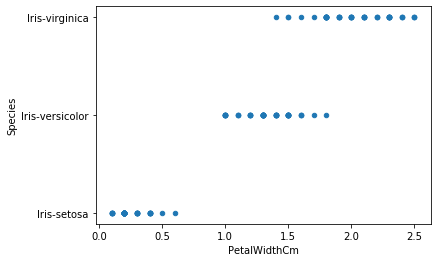

In [16]:
df.plot.scatter(x='PetalWidthCm', y='Species')

Insights
 - we can see that how each feature is clearly maintaining the difference with the other flowers

### Multi-variate analysis

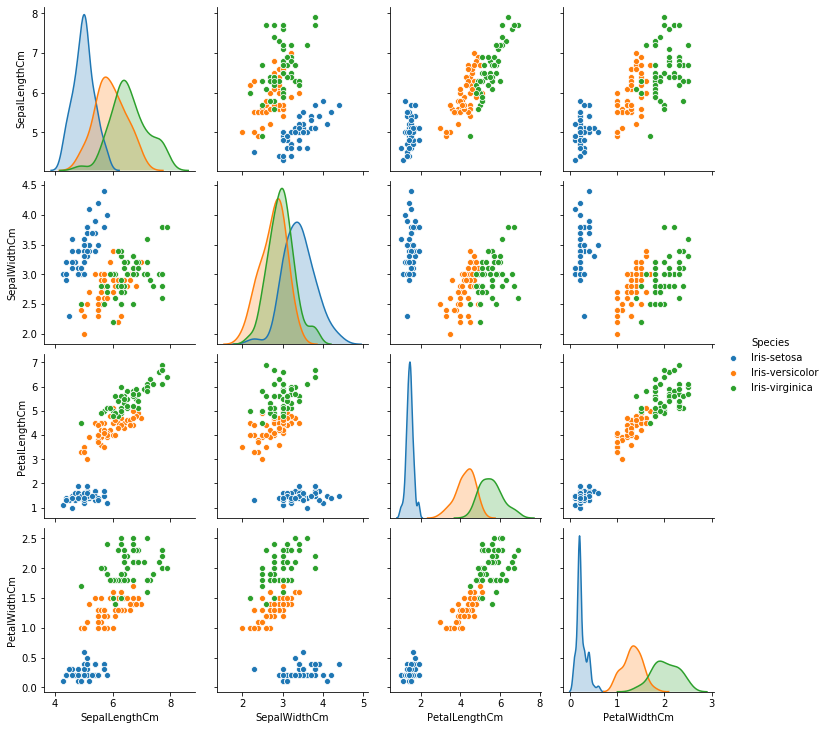

In [17]:
sns.pairplot(df, hue = 'Species')

In [18]:
cor = df.corr()

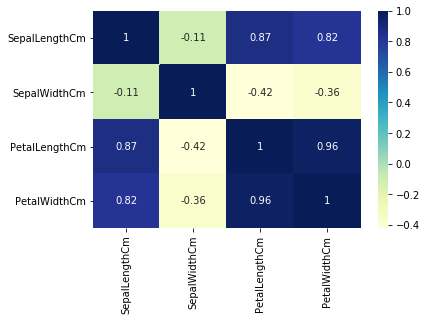

In [19]:
sns.heatmap(cor, annot=True, cmap="YlGnBu")

### splitting the data

In [20]:
X = df.drop(['Species'], axis = 1)
y = df['Species']

In [21]:
# importing the train_test_split library
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


## Decision tree model

In [22]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, except for max_depth which is 6 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [24]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```graphviz``` library to plot a tree.

In [25]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz



D:\DS\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [26]:
# Putting features
features = list(df.columns[:-1])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

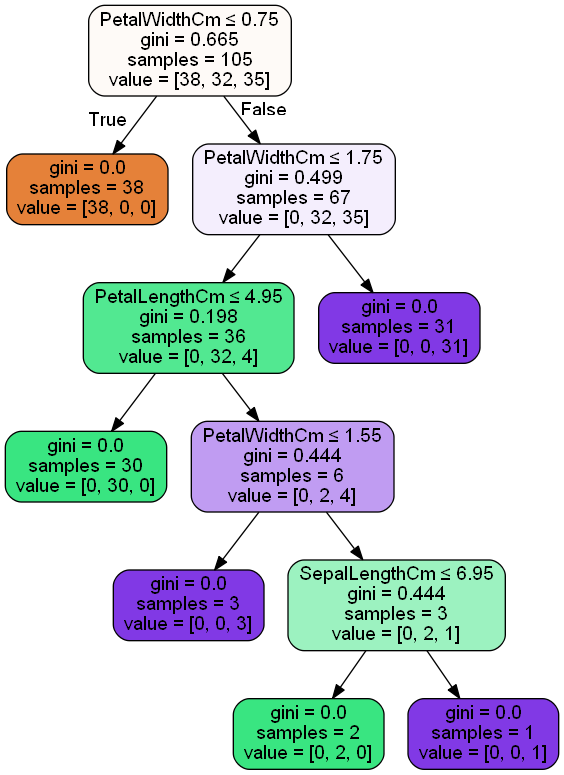

In [27]:
# plotting tree with max_depth=3 (explain this)
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())